In [223]:
#import sys
#sys.path.insert(0,'../../pycococreatortools')

%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import cv2

# added - draw bounding box and label
CATEGORIES = [
    {
        'id': 1,
        'name': 'patternless',
        'supercategory': 'crestedgecko',
    },
    {
        'id': 2,
        'name': 'dalmatian',
        'supercategory': 'crestedgecko',
    },
    {
        'id': 3,
        'name': 'lilywhite',
        'supercategory': 'crestedgecko',
    },
    {
        'id': 4,
        'name': 'tricolor',
        'supercategory': 'crestedgecko',
    },
    {
        'id': 5,
        'name': 'bicolor',
        'supercategory': 'crestedgecko',
    },
    {
        'id': 6,
        'name': 'axanthic',
        'supercategory': 'crestedgecko',
    },
    {
        'id': 7,
        'name': 'harlequin',
        'supercategory': 'crestedgecko',
    }
]

In [224]:
image_directory = 'train/crestedgecko_train2018/'
annotation_file = 'train/annotations/instances_crestedgecko_train2018.json'

In [225]:
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [226]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
patternless dalmatian lilywhite tricolor bicolor axanthic harlequin

Custom COCO supercategories: 
crestedgecko


In [227]:
category_ids = example_coco.getCatIds(catNms=['patternless'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]

In [228]:
image_data

{u'coco_url': u'',
 u'date_captured': u'2018-11-20 15:35:31.023735',
 u'file_name': u'CG_train2018_000000000001.jpg',
 u'flickr_url': u'',
 u'height': 480,
 u'id': 1,
 u'license': 1,
 u'width': 640}

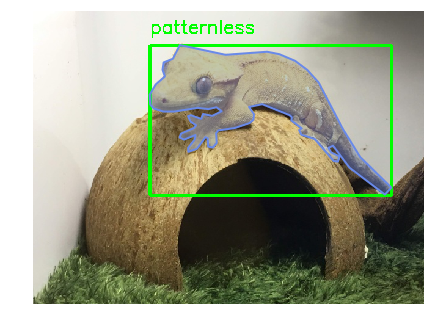

In [245]:
# added - draw bounding box and label
def showAnnsBBox(image, annos):
    color = (0,255,0)

    for ann in annotations:
        box = ann['bbox']
        cv2.rectangle(image, (int(box[0]), int(box[1])), (int(box[0])+int(box[2]), int(box[1])+int(box[3])), color , 3)
        class_name = [x['name'] for x in CATEGORIES if x['id'] == ann['category_id']][0]
        cv2.putText(image, class_name, (int(box[0]),int(box[1]-20)), 0, 1, color, 2)
        plt.imshow(image);
        
# load and display instance annotations
image = io.imread(image_directory + image_data['file_name'])

plt.figure(figsize=(7,7))
plt.imshow(image); plt.axis('off')
#pylab.rcParams['figure.figsize'] = (8.0, 10.0)

# draw segmentation
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)

example_coco.showAnns(annotations)

# added - draw bounding box and label
showAnnsBBox(image, annotations)